In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
population = pd.read_csv('../BDD/population.csv')
energy = pd.read_csv('../BDD/energy.csv')
gdp = pd.read_csv('../BDD/world-gdp-over-the-last-two-millennia.csv')
gpec = pd.read_csv('../BDD/global-energy-substitution.csv')
total = gpec['Wind (TWh; substituted energy)']+gpec['Oil (TWh; substituted energy)']+gpec['Nuclear (TWh; substituted energy)']+ gpec['Hydropower (TWh; substituted energy)']+gpec['Traditional bimass (TWh; substituted energy)']+gpec['Other renewables (TWh; substituted energy)']+gpec['Biofuels (TWh; substituted energy)']+gpec['Solar (TWh; substituted energy)']+ gpec['Coal (TWh; substituted energy)']+gpec['Gas (TWh; substituted energy)']
gpec['Total (TWh)']=total
gpec.head()

,Entity,Code,Year,Wind (TWh; substituted energy),Oil (TWh; substituted energy),Nuclear (TWh; substituted energy),Hydropower (TWh; substituted energy),Traditional bimass (TWh; substituted energy),Other renewables (TWh; substituted energy),Biofuels (TWh; substituted energy),Solar (TWh; substituted energy),Coal (TWh; substituted energy),Gas (TWh; substituted energy),Total (TWh)
0,World,OWID_WRL,1800,0,0,0,0,5556,0,0,0,97,0,5653
1,World,OWID_WRL,1810,0,0,0,0,5833,0,0,0,128,0,5961
2,World,OWID_WRL,1820,0,0,0,0,6111,0,0,0,153,0,6264
3,World,OWID_WRL,1830,0,0,0,0,6389,0,0,0,264,0,6653
4,World,OWID_WRL,1840,0,0,0,0,6944,0,0,0,356,0,7300


In [60]:
population[population.Code == 'OWID_WRL']
energy[energy.Code == 'OWID_WRL']
gdp[gdp.Code == 'OWID_WRL']

int = pd.merge(gdp[gdp.Code == 'OWID_WRL'],gpec[gpec.Code == 'OWID_WRL'], on=['Year'] )
complete_data = pd.merge(int, gdp, on=['Year'])
complete_data.head()
int.head()

,Entity_x,Code_x,Year,World GDP in 2011 Int.$ (OWID based on World Bank & Maddison (2017)),Entity_y,Code_y,Wind (TWh; substituted energy),Oil (TWh; substituted energy),Nuclear (TWh; substituted energy),Hydropower (TWh; substituted energy),Traditional bimass (TWh; substituted energy),Other renewables (TWh; substituted energy),Biofuels (TWh; substituted energy),Solar (TWh; substituted energy),Coal (TWh; substituted energy),Gas (TWh; substituted energy),Total (TWh)
0,World,OWID_WRL,1820,1.202361e+12,World,OWID_WRL,0,0,0,0,6111,0,0,0,153,0,6264
1,World,OWID_WRL,1870,1.923917e+12,World,OWID_WRL,0,6,0,0,6944,0,0,0,1642,0,8592
2,World,OWID_WRL,1900,3.418754e+12,World,OWID_WRL,0,181,0,44,6111,0,0,0,5728,64,12128
3,World,OWID_WRL,1940,7.806369e+12,World,OWID_WRL,0,2653,0,504,7222,0,0,0,11586,875,22840
4,World,OWID_WRL,1950,9.251063e+12,World,OWID_WRL,0,5444,0,877,7500,0,0,0,12603,2092,28516


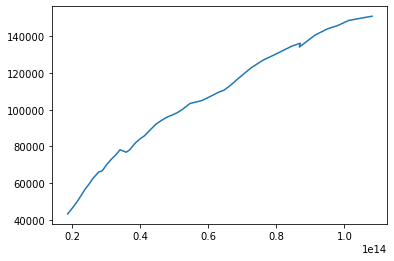

In [3]:
plt.plot(complete_data['World GDP in 2011 Int.$ (OWID based on World Bank & Maddison (2017))'], complete_data['Primary energy consumption (TWh)'])

In [63]:
def derivee(t, y) :
    der = []
    n=len(t)-2
    for i in range(2,n) : 
        der.append((y[i+2]-y[i-2])/(t[i+2]-t[i-2]))
    return t[2:n], np.array(der)

gdp = np.array(int['World GDP in 2011 Int.$ (OWID based on World Bank & Maddison (2017))'])
energy = np.array(int['Total (TWh)'])
time = int['Year']

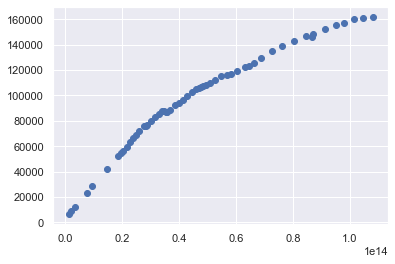

In [65]:
plt.scatter(gdp,energy)

In [66]:
import regressions as reg

def piecewise_regression(xdata, ydata, step = 2) :
    n = len(xdata)

    r1, y1 = reg.linReg(xdata[0:step+1], ydata[0:step+1])
    linLoss = reg.linLoss(xdata[0:step], ydata[0:step], r1, y1)

    r2, y2= reg.expReg(xdata[step:], ydata[step:])
    expLoss = reg.expLoss(xdata[step:], ydata[step:], r2, y2)

    loss = linLoss+expLoss
    lim = step

    for i in range (step, n, step) :
        rlin, ylin = reg.linReg(xdata[0:i], ydata[0:i])
        rexp, yexp = reg.expReg(xdata[i:], ydata[i:])
        linLoss = reg.linLoss(xdata[0:i], ydata[0:i], rlin, ylin)
        expLoss = reg.expLoss(xdata[i:], ydata[i:], rexp, yexp)
        if expLoss+linLoss < loss : 
            loss = expLoss+linLoss
            r1, y1 = rlin, ylin
            r2, y2 = rexp, yexp
            lim = i
    return lim, (r1, y1), (r2, y2)

x = gdp/10**14
y = energy/10**4
piecewise_regression(x, y, 1)

C:\Users\leatr\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\leatr\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\leatr\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(26,
 (23.729141401776776, 0.6576128494436961),
 (0.7925236904951344, 7.318064466848879))

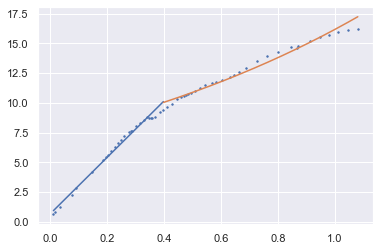

In [67]:
plt.scatter(x,y, s=2)
plt.plot(np.linspace(x[0], x[26], 200), reg.lin_fun(np.linspace(x[0], x[26], 200), r= 23.729141401776776, y0=0.6576128494436961))
plt.plot(np.linspace(x[26], x[len(x)-1], 200), reg.exp_fun(np.linspace(x[26], x[len(x)-1], 200), r=0.7925236904951344, y0=7.318064466848879 ))

In [68]:
a, xlim, r, y0 = reg.linExpReg(x,y, p0 = (18.464485019831177, x[23], 0.8267, 6.5158))

Text(0, 0.5, 'GDP (10e14 $)')

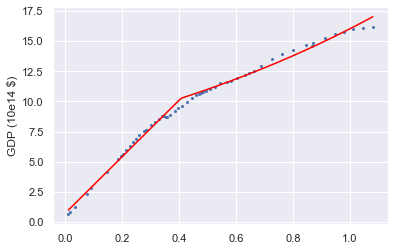

In [69]:
import seaborn as sns 
sns.set_theme()

plt.scatter(x,y, s=4)
xplot = np.linspace(x.min(), x.max(), 200)
plt.plot(xplot, reg.lin_exp(xplot,a, xlim, r, y0 ), color='red')
plt.xlabel("")
plt.ylabel("GDP (10e14 $)")

In [70]:
dist = np.array([abs(x[i]-xlim )for i in range(len(x))])
i = dist.argmin()
complete_data['Year'][i]


1986

array([0.1865562 , 0.19672778, 0.20404807, 0.21527596, 0.22715481,
       0.2386674 , 0.24855937, 0.26038226, 0.27766318, 0.28412737,
       0.28846053, 0.30253176, 0.31479914, 0.32864033, 0.34039055,
       0.34727063, 0.35407765, 0.35799147, 0.36817347, 0.38496722,
       0.39823611, 0.41231971, 0.42812896, 0.44649649, 0.46076842,
       0.470438  , 0.476509  , 0.484851  , 0.494155  , 0.508866  ,
       0.525766  , 0.546052  , 0.567721  , 0.581595  , 0.602475  ,
       0.631009  , 0.646392  , 0.664209  , 0.688949  , 0.726182  ,
       0.760892  , 0.802026  , 0.845765  , 0.870207  , 0.867501  ,
       0.913297  , 0.949824  , 0.980323  , 1.0127    , 1.0472    ,
       1.0812    ])

AttributeError: 'numpy.ndarray' object has no attribute 'describe'